#### parte 1 - unir dados em um unico arquivo CSV

In [2]:
import os
import pandas as pd

# Unir arquivos da BNW
directory_path = r'D:\\Pós DS\\Dados'

# Lista para armazenar os dataframes dos arquivos que começam com "BNW"
bnw_dataframes = []

# Percorre todos os arquivos no diretório
for filename in os.listdir(directory_path):
    if filename.startswith("BNW") and filename.endswith(".csv"):

        file_path = os.path.join(directory_path, filename)
        
        try:
            df = pd.read_csv(file_path, delimiter=';', encoding='mbcs')
            bnw_dataframes.append(df)
        
        except Exception as e:
            print(f"Erro ao ler o arquivo {file_path}: {e}")

combined_bnw_df = pd.concat(bnw_dataframes, ignore_index=True)

combined_bnw_df.to_csv(r'D:\\Pós DS\Dados\\full_beleza_data.csv', index=False, sep=';', encoding='utf-8-sig')


#### parte 2 - quebrar dataset em 3 partes: a de preços; de descrição dos produtos; de comentarios

In [2]:
import pandas as pd

file_path = 'D:\\Pós DS\\prep\\full_beleza_data.csv'

# Ler o arquivo CSV
combined_bnw_df = pd.read_csv(file_path, delimiter=';', encoding='utf-8-sig')

In [3]:
combined_bnw_df.describe()

,spo-temp,spo-umid,spo-uv,bra-temp,bra-umid,bra-uv,pve-temp,pve-umid,pve-uv,flo-temp,flo-umid,flo-uv,rj-temp,rj-umid,rj-uv
count,7032.000000,7032.000000,7032.000000,7032.000000,7032.000000,7032.000000,7032.000000,7032.000000,7032.000000,7032.000000,7032.000000,7032.000000,7032.000000,7032.000000,7032.000000
mean,20.541013,59.613339,4.759101,25.105759,38.981513,5.681598,29.944696,56.308589,6.913538,18.425100,78.401024,4.006968,23.779721,71.580916,4.671786
std,6.888071,24.894794,3.201966,4.751327,14.504785,3.201881,4.236957,16.477818,3.999634,3.803643,11.398517,2.543510,3.959594,13.900534,3.272102
min,5.000000,18.000000,1.000000,11.300000,15.000000,1.000000,20.000000,28.000000,1.000000,8.300000,52.000000,1.000000,16.200000,39.000000,1.000000
25%,16.300000,37.000000,1.000000,23.200000,29.000000,1.000000,27.200000,44.000000,1.000000,16.200000,72.000000,1.000000,21.300000,63.000000,1.000000
50%,18.400000,71.000000,5.000000,26.300000,39.000000,8.000000,29.400000,54.000000,9.000000,19.200000,78.000000,5.000000,23.300000,73.000000,6.000000
75%,26.300000,82.000000,8.000000,28.300000,47.000000,8.000000,33.000000,66.000000,10.000000,21.000000,88.000000,6.000000,26.200000,83.000000,8.000000
max,33.400000,94.000000,9.000000,31.200000,73.000000,9.000000,38.400000,89.000000,11.000000,28.000000,94.000000,8.000000,33.400000,100.000000,9.000000


In [4]:
combined_bnw_df.dtypes

prod-descr          object
prod-marca          object
prod-URL            object
prod-preco          object
prod-detalhe        object
prod-comentario     object
prod-aval           object
data_ref            object
spo-temp           float64
spo-umid             int64
spo-uv               int64
bra-temp           float64
bra-umid             int64
bra-uv               int64
pve-temp           float64
pve-umid             int64
pve-uv               int64
flo-temp           float64
flo-umid             int64
flo-uv               int64
rj-temp            float64
rj-umid              int64
rj-uv                int64
dtype: object

In [5]:
combined_bnw_df.head()

,prod-descr,prod-marca,prod-URL,prod-preco,prod-detalhe,prod-comentario,prod-aval,data_ref,spo-temp,spo-umid,...,bra-uv,pve-temp,pve-umid,pve-uv,flo-temp,flo-umid,flo-uv,rj-temp,rj-umid,rj-uv
0,Sunmax Intense FPS60 - Protetor Solar Facial...,Sunmax,https://www.belezanaweb.com.br/sunmax-intense-...,"78,90",Protetor solar facial para pele equilibrada a ...,"não gostei , desenvolvi algum tipo de reação, ...",4.5,01/09/2024 15:04:17,31.3,21,...,8,37.1,35,11,23.2,69,7,29.2,52,8
1,Sunmax Intense FPS60 - Protetor Solar Facial...,Sunmax,https://www.belezanaweb.com.br/sunmax-intense-...,"78,90",Protetor solar facial para pele equilibrada a ...,Excelente,4.5,01/09/2024 15:04:17,31.3,21,...,8,37.1,35,11,23.2,69,7,29.2,52,8
2,Sunmax Intense FPS60 - Protetor Solar Facial...,Sunmax,https://www.belezanaweb.com.br/sunmax-intense-...,"78,90",Protetor solar facial para pele equilibrada a ...,Excelente Produto amoo…,4.5,01/09/2024 15:04:17,31.3,21,...,8,37.1,35,11,23.2,69,7,29.2,52,8
3,Sunmax Intense FPS60 - Protetor Solar Facial...,Sunmax,https://www.belezanaweb.com.br/sunmax-intense-...,"78,90",Protetor solar facial para pele equilibrada a ...,"Excelente produto, não deixa pele oleosa, rápi...",4.5,01/09/2024 15:04:17,31.3,21,...,8,37.1,35,11,23.2,69,7,29.2,52,8
4,Sunmax Intense FPS60 - Protetor Solar Facial...,Sunmax,https://www.belezanaweb.com.br/sunmax-intense-...,"78,90",Protetor solar facial para pele equilibrada a ...,"Ótimo protetor, hidrata bastante a pele.",4.5,01/09/2024 15:04:17,31.3,21,...,8,37.1,35,11,23.2,69,7,29.2,52,8


In [6]:
df_preco = combined_bnw_df.drop(columns=["prod-detalhe", "prod-comentario", "prod-URL", "prod-aval"], errors='ignore')

df_detalhe = combined_bnw_df[["prod-descr", "prod-marca", "prod-detalhe"]]

df_comentarios = combined_bnw_df[["prod-descr", "prod-marca", "prod-comentario", "prod-aval"]]

#### parte 3 - preparar dataset de preços

In [7]:
df_preco.head()

,prod-descr,prod-marca,prod-preco,data_ref,spo-temp,spo-umid,spo-uv,bra-temp,bra-umid,bra-uv,pve-temp,pve-umid,pve-uv,flo-temp,flo-umid,flo-uv,rj-temp,rj-umid,rj-uv
0,Sunmax Intense FPS60 - Protetor Solar Facial...,Sunmax,"78,90",01/09/2024 15:04:17,31.3,21,9,30.3,21,8,37.1,35,11,23.2,69,7,29.2,52,8
1,Sunmax Intense FPS60 - Protetor Solar Facial...,Sunmax,"78,90",01/09/2024 15:04:17,31.3,21,9,30.3,21,8,37.1,35,11,23.2,69,7,29.2,52,8
2,Sunmax Intense FPS60 - Protetor Solar Facial...,Sunmax,"78,90",01/09/2024 15:04:17,31.3,21,9,30.3,21,8,37.1,35,11,23.2,69,7,29.2,52,8
3,Sunmax Intense FPS60 - Protetor Solar Facial...,Sunmax,"78,90",01/09/2024 15:04:17,31.3,21,9,30.3,21,8,37.1,35,11,23.2,69,7,29.2,52,8
4,Sunmax Intense FPS60 - Protetor Solar Facial...,Sunmax,"78,90",01/09/2024 15:04:17,31.3,21,9,30.3,21,8,37.1,35,11,23.2,69,7,29.2,52,8


In [8]:
df_preco = df_preco.drop_duplicates()

In [9]:
df_preco_ordenado = df_preco.sort_values(by="prod-descr", ascending=True)

In [10]:
df_preco_ordenado.head(20)

,prod-descr,prod-marca,prod-preco,data_ref,spo-temp,spo-umid,spo-uv,bra-temp,bra-umid,bra-uv,pve-temp,pve-umid,pve-uv,flo-temp,flo-umid,flo-uv,rj-temp,rj-umid,rj-uv
4846,Ada Tina Normalize Solar Hydra Comfort FPS 9...,Ada Tina,"151,90",23/08/2024 15:03:20,32.2,20,9,30.0,24,9,38.4,29,11,17.2,83,5,33.4,39,9
4713,Ada Tina Normalize Solar Hydra Comfort FPS 9...,Ada Tina,"151,90",23/08/2024 09:49:12,23.4,47,8,23.2,41,8,29.2,62,7,19.3,83,5,26.2,70,9
1942,Ada Tina Normalize Solar Matte Intense FPS 5...,Ada Tina,"105,90",12/09/2024 09:54:47,25.1,39,8,23.2,47,8,27.3,79,9,20.0,94,7,27.1,62,9
579,Adcos Fotoproteção Diária Aqua Fluid FPS50 I...,Adcos,"149,00",03/09/2024 14:05:10,30.1,35,9,31.0,16,9,33.0,47,11,23.2,65,7,24.4,74,8
485,Adcos Fotoproteção Diária Aqua Fluid FPS50 I...,Adcos,"149,00",02/09/2024 21:16:23,17.1,83,1,25.0,24,1,29.0,62,1,16.2,82,1,22.1,83,1
380,Adcos Fotoproteção Diária Aqua Fluid FPS50 I...,Adcos,"149,00",02/09/2024 07:58:13,18.1,83,7,15.2,59,7,24.2,83,1,14.3,94,4,23.1,69,7
602,Adcos Fotoproteção Diária Aqua Fluid FPS50 P...,Adcos,"149,00",03/09/2024 14:05:10,30.1,35,9,31.0,16,9,33.0,47,11,23.2,65,7,24.4,74,8
694,Adcos Fotoproteção Diária Aqua Fluid FPS50 P...,Adcos,"149,00",04/09/2024 08:05:10,18.2,88,8,14.4,59,8,25.3,89,7,16.4,88,6,21.4,88,7
504,Adcos Fotoproteção Diária Aqua Fluid FPS50 P...,Adcos,"149,00",02/09/2024 21:16:23,17.1,83,1,25.0,24,1,29.0,62,1,16.2,82,1,22.1,83,1
1228,Adcos Fotoproteção Diária Aqua Fluid FPS50 T...,Adcos,"149,00",08/09/2024 17:14:45,33.1,23,8,30.1,21,8,36.2,39,11,23.2,78,7,28.3,66,7


In [12]:
df_preco_ordenado["prod-preco"] = df_preco_ordenado["prod-preco"].astype(str).str.replace(',', '.').astype(float)

In [13]:
df_preco_ordenado.head(20)

,prod-descr,prod-marca,prod-preco,data_ref,spo-temp,spo-umid,spo-uv,bra-temp,bra-umid,bra-uv,pve-temp,pve-umid,pve-uv,flo-temp,flo-umid,flo-uv,rj-temp,rj-umid,rj-uv
4846,Ada Tina Normalize Solar Hydra Comfort FPS 9...,Ada Tina,151.90,23/08/2024 15:03:20,32.2,20,9,30.0,24,9,38.4,29,11,17.2,83,5,33.4,39,9
4713,Ada Tina Normalize Solar Hydra Comfort FPS 9...,Ada Tina,151.90,23/08/2024 09:49:12,23.4,47,8,23.2,41,8,29.2,62,7,19.3,83,5,26.2,70,9
1942,Ada Tina Normalize Solar Matte Intense FPS 5...,Ada Tina,105.90,12/09/2024 09:54:47,25.1,39,8,23.2,47,8,27.3,79,9,20.0,94,7,27.1,62,9
579,Adcos Fotoproteção Diária Aqua Fluid FPS50 I...,Adcos,149.00,03/09/2024 14:05:10,30.1,35,9,31.0,16,9,33.0,47,11,23.2,65,7,24.4,74,8
485,Adcos Fotoproteção Diária Aqua Fluid FPS50 I...,Adcos,149.00,02/09/2024 21:16:23,17.1,83,1,25.0,24,1,29.0,62,1,16.2,82,1,22.1,83,1
380,Adcos Fotoproteção Diária Aqua Fluid FPS50 I...,Adcos,149.00,02/09/2024 07:58:13,18.1,83,7,15.2,59,7,24.2,83,1,14.3,94,4,23.1,69,7
602,Adcos Fotoproteção Diária Aqua Fluid FPS50 P...,Adcos,149.00,03/09/2024 14:05:10,30.1,35,9,31.0,16,9,33.0,47,11,23.2,65,7,24.4,74,8
694,Adcos Fotoproteção Diária Aqua Fluid FPS50 P...,Adcos,149.00,04/09/2024 08:05:10,18.2,88,8,14.4,59,8,25.3,89,7,16.4,88,6,21.4,88,7
504,Adcos Fotoproteção Diária Aqua Fluid FPS50 P...,Adcos,149.00,02/09/2024 21:16:23,17.1,83,1,25.0,24,1,29.0,62,1,16.2,82,1,22.1,83,1
1228,Adcos Fotoproteção Diária Aqua Fluid FPS50 T...,Adcos,149.00,08/09/2024 17:14:45,33.1,23,8,30.1,21,8,36.2,39,11,23.2,78,7,28.3,66,7


In [16]:
df_preco_ordenado.loc[:, 'data_ref'] = pd.to_datetime(df_preco_ordenado['data_ref'])

In [17]:
df_preco_ordenado.head(20)

,prod-descr,prod-marca,prod-preco,data_ref,spo-temp,spo-umid,spo-uv,bra-temp,bra-umid,bra-uv,pve-temp,pve-umid,pve-uv,flo-temp,flo-umid,flo-uv,rj-temp,rj-umid,rj-uv
4846,Ada Tina Normalize Solar Hydra Comfort FPS 9...,Ada Tina,151.90,2024-08-23 15:03:20,32.2,20,9,30.0,24,9,38.4,29,11,17.2,83,5,33.4,39,9
4713,Ada Tina Normalize Solar Hydra Comfort FPS 9...,Ada Tina,151.90,2024-08-23 09:49:12,23.4,47,8,23.2,41,8,29.2,62,7,19.3,83,5,26.2,70,9
1942,Ada Tina Normalize Solar Matte Intense FPS 5...,Ada Tina,105.90,2024-09-12 09:54:47,25.1,39,8,23.2,47,8,27.3,79,9,20.0,94,7,27.1,62,9
579,Adcos Fotoproteção Diária Aqua Fluid FPS50 I...,Adcos,149.00,2024-09-03 14:05:10,30.1,35,9,31.0,16,9,33.0,47,11,23.2,65,7,24.4,74,8
485,Adcos Fotoproteção Diária Aqua Fluid FPS50 I...,Adcos,149.00,2024-09-02 21:16:23,17.1,83,1,25.0,24,1,29.0,62,1,16.2,82,1,22.1,83,1
380,Adcos Fotoproteção Diária Aqua Fluid FPS50 I...,Adcos,149.00,2024-09-02 07:58:13,18.1,83,7,15.2,59,7,24.2,83,1,14.3,94,4,23.1,69,7
602,Adcos Fotoproteção Diária Aqua Fluid FPS50 P...,Adcos,149.00,2024-09-03 14:05:10,30.1,35,9,31.0,16,9,33.0,47,11,23.2,65,7,24.4,74,8
694,Adcos Fotoproteção Diária Aqua Fluid FPS50 P...,Adcos,149.00,2024-09-04 08:05:10,18.2,88,8,14.4,59,8,25.3,89,7,16.4,88,6,21.4,88,7
504,Adcos Fotoproteção Diária Aqua Fluid FPS50 P...,Adcos,149.00,2024-09-02 21:16:23,17.1,83,1,25.0,24,1,29.0,62,1,16.2,82,1,22.1,83,1
1228,Adcos Fotoproteção Diária Aqua Fluid FPS50 T...,Adcos,149.00,2024-09-08 17:14:45,33.1,23,8,30.1,21,8,36.2,39,11,23.2,78,7,28.3,66,7


In [18]:
df_preco_ordenado.describe()

,prod-preco,data_ref,spo-temp,spo-umid,spo-uv,bra-temp,bra-umid,bra-uv,pve-temp,pve-umid,pve-uv,flo-temp,flo-umid,flo-uv,rj-temp,rj-umid,rj-uv
count,1728.000000,1728,1728.000000,1728.000000,1728.000000,1728.000000,1728.000000,1728.000000,1728.000000,1728.000000,1728.000000,1728.000000,1728.000000,1728.000000,1728.000000,1728.000000,1728.000000
mean,91.471244,2024-09-03 22:23:09.041666816,20.722917,59.437500,4.833333,25.054167,38.791667,5.708333,29.958333,56.645833,6.958333,18.408333,78.437500,4.020833,23.797917,72.104167,4.729167
min,19.900000,2024-08-20 18:21:07,5.000000,18.000000,1.000000,11.300000,15.000000,1.000000,20.000000,28.000000,1.000000,8.300000,52.000000,1.000000,16.200000,39.000000,1.000000
25%,60.800000,2024-08-26 14:41:30.500000,16.900000,36.500000,1.000000,22.950000,28.750000,1.000000,27.150000,44.750000,1.000000,16.200000,71.750000,1.000000,21.375000,63.750000,1.000000
50%,78.900000,2024-09-02 14:37:18,18.800000,67.500000,5.000000,26.250000,38.000000,8.000000,29.350000,54.500000,9.000000,19.200000,80.000000,5.000000,23.300000,73.000000,6.000000
75%,105.900000,2024-09-12 12:35:30.750000128,26.500000,82.000000,8.000000,28.300000,47.500000,8.000000,33.075000,67.000000,10.000000,20.550000,84.250000,6.000000,24.850000,83.000000,8.000000
max,355.000000,2024-09-20 18:28:44,33.400000,94.000000,9.000000,31.200000,73.000000,9.000000,38.400000,89.000000,11.000000,28.000000,94.000000,8.000000,33.400000,100.000000,9.000000
std,52.274670,NaN,6.808439,24.916133,3.211156,4.811320,14.575821,3.208721,4.222292,16.744880,3.969557,3.724362,11.316811,2.521391,3.898055,14.103785,3.271647


In [19]:
df_preco_ordenado.dtypes

prod-descr            object
prod-marca            object
prod-preco           float64
data_ref      datetime64[ns]
spo-temp             float64
spo-umid               int64
spo-uv                 int64
bra-temp             float64
bra-umid               int64
bra-uv                 int64
pve-temp             float64
pve-umid               int64
pve-uv                 int64
flo-temp             float64
flo-umid               int64
flo-uv                 int64
rj-temp              float64
rj-umid                int64
rj-uv                  int64
dtype: object

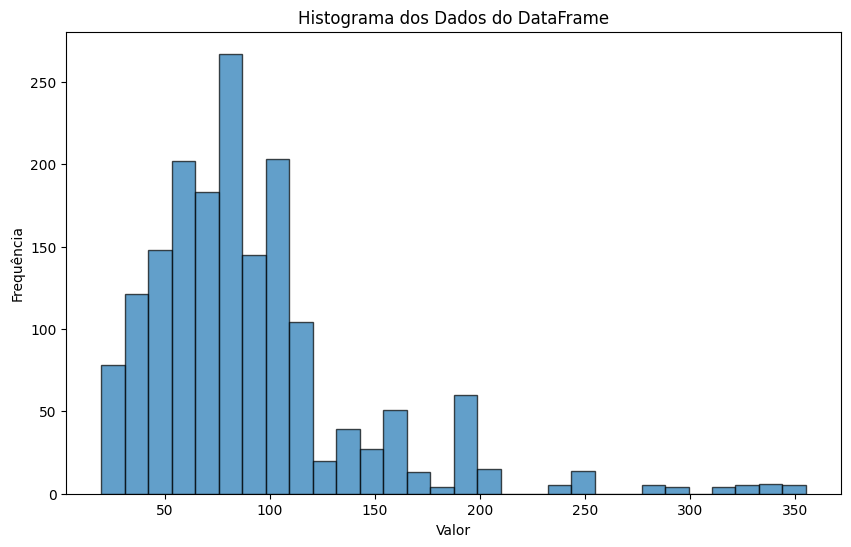

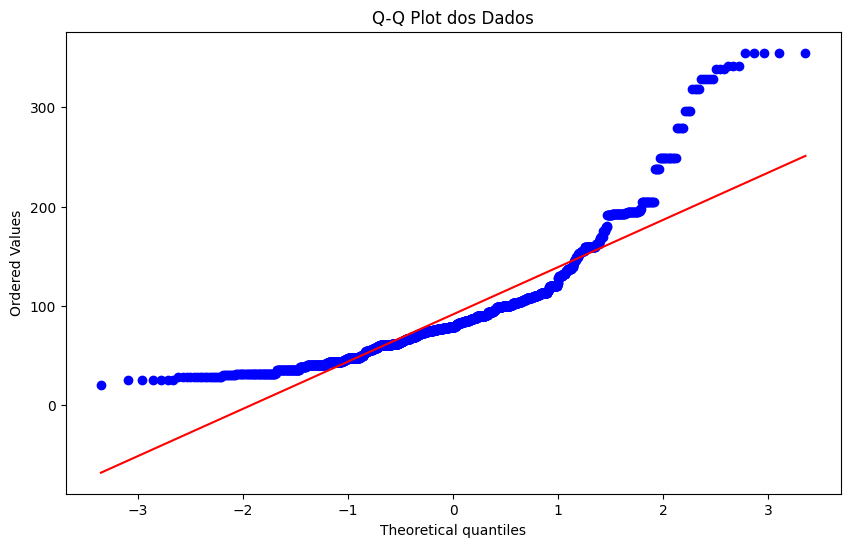

In [23]:
import matplotlib.pyplot as plt
import scipy.stats as stats

plt.figure(figsize=(10, 6))
plt.hist(df_preco_ordenado['prod-preco'], bins=30, edgecolor='black', alpha=0.7)
plt.title('Histograma dos Dados do DataFrame')
plt.xlabel('Valor')
plt.ylabel('Frequência')
plt.show()

# Criar um Q-Q plot para verificar a normalidade dos dados do DataFrame
plt.figure(figsize=(10, 6))
stats.probplot(df_preco_ordenado['prod-preco'], dist="norm", plot=plt)
plt.title('Q-Q Plot dos Dados')
plt.show()

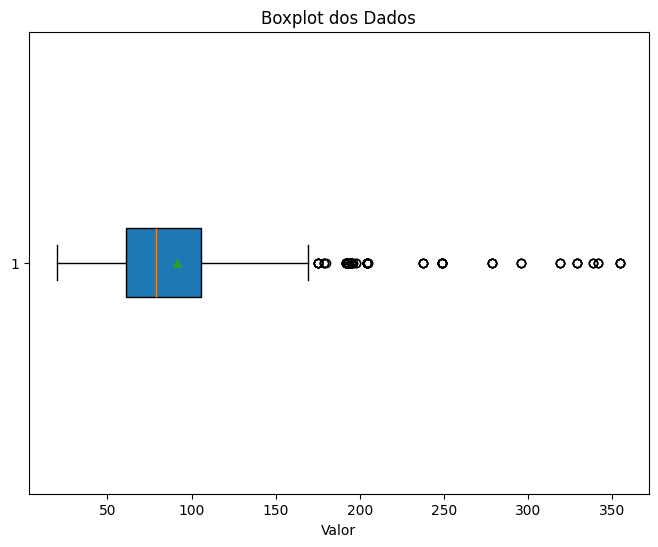

In [24]:
plt.figure(figsize=(8, 6))
plt.boxplot(df_preco_ordenado['prod-preco'], vert=False, patch_artist=True, showmeans=True)
plt.title('Boxplot dos Dados')
plt.xlabel('Valor')
plt.show()

In [26]:
def definir_periodo(hora):
    if 5 <= hora < 12:
        return "manha"
    elif 12 <= hora < 18:
        return "tarde"
    elif 18 <= hora < 24:
        return "noite"
    else:
        return "madrugada"

df_preco_ordenado['periodo_dia'] = df_preco_ordenado['data_ref'].dt.hour.apply(definir_periodo)
df_preco_ordenado.head()

,prod-descr,prod-marca,prod-preco,data_ref,spo-temp,spo-umid,spo-uv,bra-temp,bra-umid,bra-uv,pve-temp,pve-umid,pve-uv,flo-temp,flo-umid,flo-uv,rj-temp,rj-umid,rj-uv,periodo_dia
4846,Ada Tina Normalize Solar Hydra Comfort FPS 9...,Ada Tina,151.9,2024-08-23 15:03:20,32.2,20,9,30.0,24,9,38.4,29,11,17.2,83,5,33.4,39,9,tarde
4713,Ada Tina Normalize Solar Hydra Comfort FPS 9...,Ada Tina,151.9,2024-08-23 09:49:12,23.4,47,8,23.2,41,8,29.2,62,7,19.3,83,5,26.2,70,9,manha
1942,Ada Tina Normalize Solar Matte Intense FPS 5...,Ada Tina,105.9,2024-09-12 09:54:47,25.1,39,8,23.2,47,8,27.3,79,9,20.0,94,7,27.1,62,9,manha
579,Adcos Fotoproteção Diária Aqua Fluid FPS50 I...,Adcos,149.0,2024-09-03 14:05:10,30.1,35,9,31.0,16,9,33.0,47,11,23.2,65,7,24.4,74,8,tarde
485,Adcos Fotoproteção Diária Aqua Fluid FPS50 I...,Adcos,149.0,2024-09-02 21:16:23,17.1,83,1,25.0,24,1,29.0,62,1,16.2,82,1,22.1,83,1,noite


In [27]:
df_preco_ordenado['data_ref'] = df_preco_ordenado['data_ref'].dt.strftime('%Y-%m-%d %H:%M')
df_preco_ordenado.head()

,prod-descr,prod-marca,prod-preco,data_ref,spo-temp,spo-umid,spo-uv,bra-temp,bra-umid,bra-uv,pve-temp,pve-umid,pve-uv,flo-temp,flo-umid,flo-uv,rj-temp,rj-umid,rj-uv,periodo_dia
4846,Ada Tina Normalize Solar Hydra Comfort FPS 9...,Ada Tina,151.9,2024-08-23 15:03,32.2,20,9,30.0,24,9,38.4,29,11,17.2,83,5,33.4,39,9,tarde
4713,Ada Tina Normalize Solar Hydra Comfort FPS 9...,Ada Tina,151.9,2024-08-23 09:49,23.4,47,8,23.2,41,8,29.2,62,7,19.3,83,5,26.2,70,9,manha
1942,Ada Tina Normalize Solar Matte Intense FPS 5...,Ada Tina,105.9,2024-09-12 09:54,25.1,39,8,23.2,47,8,27.3,79,9,20.0,94,7,27.1,62,9,manha
579,Adcos Fotoproteção Diária Aqua Fluid FPS50 I...,Adcos,149.0,2024-09-03 14:05,30.1,35,9,31.0,16,9,33.0,47,11,23.2,65,7,24.4,74,8,tarde
485,Adcos Fotoproteção Diária Aqua Fluid FPS50 I...,Adcos,149.0,2024-09-02 21:16,17.1,83,1,25.0,24,1,29.0,62,1,16.2,82,1,22.1,83,1,noite


In [28]:
df_preco_ordenado.to_csv(r'D:\\Pós DS\\prep\\bnw_data_price.csv', index=False, sep=';', encoding='utf-8-sig')

#### parte 4 - preparar dataset de detalhes dos produtos

In [29]:
df_detalhe.head()

,prod-descr,prod-marca,prod-detalhe
0,Sunmax Intense FPS60 - Protetor Solar Facial...,Sunmax,Protetor solar facial para pele equilibrada a ...
1,Sunmax Intense FPS60 - Protetor Solar Facial...,Sunmax,Protetor solar facial para pele equilibrada a ...
2,Sunmax Intense FPS60 - Protetor Solar Facial...,Sunmax,Protetor solar facial para pele equilibrada a ...
3,Sunmax Intense FPS60 - Protetor Solar Facial...,Sunmax,Protetor solar facial para pele equilibrada a ...
4,Sunmax Intense FPS60 - Protetor Solar Facial...,Sunmax,Protetor solar facial para pele equilibrada a ...


In [30]:
df_det_ordenado = df_detalhe.sort_values(by="prod-descr", ascending=True)
df_det_ordenado.head()

,prod-descr,prod-marca,prod-detalhe
4850,Ada Tina Normalize Solar Hydra Comfort FPS 9...,Ada Tina,NaN
4849,Ada Tina Normalize Solar Hydra Comfort FPS 9...,Ada Tina,NaN
4717,Ada Tina Normalize Solar Hydra Comfort FPS 9...,Ada Tina,NaN
4716,Ada Tina Normalize Solar Hydra Comfort FPS 9...,Ada Tina,NaN
4715,Ada Tina Normalize Solar Hydra Comfort FPS 9...,Ada Tina,NaN


In [31]:
df_det_ordenado.describe()

,prod-descr,prod-marca,prod-detalhe
count,7032,7032,6971
unique,223,47,170
top,Libbs Filtrum Ultra Seco FPS30 - Protetor So...,Australian Gold,Protetor solar facial com cor para todos os ti...
freq,220,700,405


In [32]:
import re

# Função para extrair o fator de proteção FPS do campo 'prod-descr'
def extrair_fps(descricao):
    match = re.search(r'FPS\s*(\d+)', descricao, re.IGNORECASE)
    if match:
        return int(match.group(1))
    return None

df_det_ordenado['prod_fps'] = df_det_ordenado['prod-descr'].apply(extrair_fps)

In [33]:
df_det_ordenado['prod_fps'] = df_det_ordenado['prod_fps'].astype('Int64')
df_det_ordenado.head()

,prod-descr,prod-marca,prod-detalhe,prod_fps
4850,Ada Tina Normalize Solar Hydra Comfort FPS 9...,Ada Tina,NaN,90
4849,Ada Tina Normalize Solar Hydra Comfort FPS 9...,Ada Tina,NaN,90
4717,Ada Tina Normalize Solar Hydra Comfort FPS 9...,Ada Tina,NaN,90
4716,Ada Tina Normalize Solar Hydra Comfort FPS 9...,Ada Tina,NaN,90
4715,Ada Tina Normalize Solar Hydra Comfort FPS 9...,Ada Tina,NaN,90


In [34]:
df_det_ordenado['prod_fps'] = df_det_ordenado['prod_fps'].fillna(0).astype(int)
df_det_ordenado.head()

,prod-descr,prod-marca,prod-detalhe,prod_fps
4850,Ada Tina Normalize Solar Hydra Comfort FPS 9...,Ada Tina,NaN,90
4849,Ada Tina Normalize Solar Hydra Comfort FPS 9...,Ada Tina,NaN,90
4717,Ada Tina Normalize Solar Hydra Comfort FPS 9...,Ada Tina,NaN,90
4716,Ada Tina Normalize Solar Hydra Comfort FPS 9...,Ada Tina,NaN,90
4715,Ada Tina Normalize Solar Hydra Comfort FPS 9...,Ada Tina,NaN,90


In [35]:
df_det_ordenado.describe()

,prod_fps
count,7032.000000
mean,57.009528
std,15.286457
min,0.000000
25%,50.000000
50%,60.000000
75%,65.000000
max,99.000000


In [36]:
df_fps_zero = df_det_ordenado[df_det_ordenado['prod_fps'] == 0]
df_fps_dif_zero = df_det_ordenado[df_det_ordenado['prod_fps'] != 0]
print(len(df_fps_zero))
print(len(df_fps_dif_zero))

31
7001


In [37]:
df_det_ordenado = df_det_ordenado.dropna(subset=['prod-detalhe'])
df_det_ordenado.head()

,prod-descr,prod-marca,prod-detalhe,prod_fps
1942,Ada Tina Normalize Solar Matte Intense FPS 5...,Ada Tina,Protetor solar para peles oleosas. Ada Tina No...,50
583,Adcos Fotoproteção Diária Aqua Fluid FPS50 I...,Adcos,Protetor solar facial com cor. Adcos Aqua Flui...,50
382,Adcos Fotoproteção Diária Aqua Fluid FPS50 I...,Adcos,Protetor solar facial com cor. Adcos Aqua Flui...,50
384,Adcos Fotoproteção Diária Aqua Fluid FPS50 I...,Adcos,Protetor solar facial com cor. Adcos Aqua Flui...,50
579,Adcos Fotoproteção Diária Aqua Fluid FPS50 I...,Adcos,Protetor solar facial com cor. Adcos Aqua Flui...,50


In [38]:
df_det_unique = df_det_ordenado.drop_duplicates()

In [39]:
df_det_unique.head()

,prod-descr,prod-marca,prod-detalhe,prod_fps
1942,Ada Tina Normalize Solar Matte Intense FPS 5...,Ada Tina,Protetor solar para peles oleosas. Ada Tina No...,50
583,Adcos Fotoproteção Diária Aqua Fluid FPS50 I...,Adcos,Protetor solar facial com cor. Adcos Aqua Flui...,50
694,Adcos Fotoproteção Diária Aqua Fluid FPS50 P...,Adcos,Protetor solar facial com cor para todos os ti...,50
1232,Adcos Fotoproteção Diária Aqua Fluid FPS50 T...,Adcos,Protetor solar facial com cor. Adcos Aqua Flui...,50
2759,Adcos Fotoproteção Diária Stick FPS80 Ivory ...,Adcos,Protetor solar facial com cor em bastão. Adcos...,80


In [40]:
df_det_unique.loc[:, 'prod-detalhe'] = df_det_unique['prod-detalhe'].str.replace('\n', ' ', regex=True)
df_det_unique.head()

,prod-descr,prod-marca,prod-detalhe,prod_fps
1942,Ada Tina Normalize Solar Matte Intense FPS 5...,Ada Tina,Protetor solar para peles oleosas. Ada Tina No...,50
583,Adcos Fotoproteção Diária Aqua Fluid FPS50 I...,Adcos,Protetor solar facial com cor. Adcos Aqua Flui...,50
694,Adcos Fotoproteção Diária Aqua Fluid FPS50 P...,Adcos,Protetor solar facial com cor para todos os ti...,50
1232,Adcos Fotoproteção Diária Aqua Fluid FPS50 T...,Adcos,Protetor solar facial com cor. Adcos Aqua Flui...,50
2759,Adcos Fotoproteção Diária Stick FPS80 Ivory ...,Adcos,Protetor solar facial com cor em bastão. Adcos...,80


In [41]:
from sklearn.feature_extraction.text import TfidfVectorizer
from nltk.corpus import stopwords
import pandas as pd
import nltk

nltk.download('stopwords')
portuguese_stopwords = stopwords.words('portuguese')

corpus = df_det_unique['prod-detalhe'].fillna("").tolist()  # Preencher valores ausentes com string vazia

vectorizer = TfidfVectorizer(ngram_range=(2, 3), stop_words=portuguese_stopwords, max_features=50)
X = vectorizer.fit_transform(corpus)

# Obter as palavras-chave e expressões mais importantes
feature_names = vectorizer.get_feature_names_out()
importance = X.toarray().sum(axis=0)

# Criar um dataframe com as palavras-chave e sua importância
keywords_df = pd.DataFrame({'expressao': feature_names, 'importancia': importance})
keywords_df = keywords_df.sort_values(by='importancia', ascending=False)

print(keywords_df)


                 expressao  importancia
26          protetor solar    46.012733
39            solar facial    29.946301
28   protetor solar facial    28.709683
13                  fps 50    22.809758
46              toque seco    19.149622
1            alta proteção    18.219185
47                 uva uvb    18.164711
43             todos tipos    15.600275
14                  fps 60    15.151493
42              tipos pele    14.806628
0           alta cobertura    14.565319
44        todos tipos pele    14.239772
32               raios uva    14.222052
33           raios uva uvb    13.966527
38               solar cor    13.768782
27      protetor solar cor    13.768782
34         resistente água    13.419382
37         rápida absorção    12.690978
41            textura leve    12.627503
3               além disso    12.585674
30          proteção solar    12.296531
10  envelhecimento precoce    12.268302
40        solar facial cor    12.209658
11              facial cor    12.209658


[nltk_data] Downloading package stopwords to
[nltk_data]     C:\Users\andre\AppData\Roaming\nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


In [43]:
len(keywords_df)

50

In [44]:
expressoes_para_remover = ['uva uvb', 'descrição produto', 'protetor solar','alta proteção','sugestão uso', 'contra raios', 'protetor solar facial','solar facial','todos tipos','tipos pele','fps 50','sun fresh','exposição sol','descrição produto protetor','produto protetor']  

keywords_df = keywords_df[~keywords_df['expressao'].isin(expressoes_para_remover)]


In [45]:
print(keywords_df)

                 expressao  importancia
46              toque seco    19.149622
14                  fps 60    15.151493
0           alta cobertura    14.565319
44        todos tipos pele    14.239772
32               raios uva    14.222052
33           raios uva uvb    13.966527
38               solar cor    13.768782
27      protetor solar cor    13.768782
34         resistente água    13.419382
37         rápida absorção    12.690978
41            textura leve    12.627503
3               além disso    12.585674
30          proteção solar    12.296531
10  envelhecimento precoce    12.268302
40        solar facial cor    12.209658
11              facial cor    12.209658
18             luz visível    12.129933
15                  fps 70    11.306729
4        ação antioxidante    10.996307
7      controle oleosidade    10.673576
25          possui textura     9.925920
49               água suor     9.635633
31         radicais livres     9.614104
48       ácido hialurônico     9.449967


In [46]:
expressoes_para_remover = ['fps 70','luz visível','facial cor','solar facial cor','proteção solar','além disso','protetor solar cor','solar cor','raios uva uvb','raios uva','alta cobertura','fps 60','raios uva','luz visível','nivea sun','rugas manchas solares','rugas manchas','antes exposição','queimaduras solares','envelhecimento precoce','contra luz','oferece alta proteção','oréal paris','oferece alta','fps 60','proteção contra','proteção solar']  

keywords_df = keywords_df[~keywords_df['expressao'].isin(expressoes_para_remover)]
print(keywords_df)

                expressao  importancia
46             toque seco    19.149622
44       todos tipos pele    14.239772
34        resistente água    13.419382
37        rápida absorção    12.690978
41           textura leve    12.627503
4       ação antioxidante    10.996307
7     controle oleosidade    10.673576
25         possui textura     9.925920
49              água suor     9.635633
31        radicais livres     9.614104
48      ácido hialurônico     9.449967
9            efeito matte     9.416557
8              deixa pele     9.365445
45               tom pele     9.355289
19       mantecorp episol     9.191580
12                 fps 30     9.133519
6        contra raios uva     8.821604
23               oil free     8.805157
22            oil control     8.244128
2    alta proteção contra     7.488730
16               la roche     7.296277
17         la roche posay     7.296277
35            roche posay     7.296277
24        posay anthelios     6.414725
36  roche posay anthelios

In [47]:
expressoes_para_remover = ['roche posay anthelios','posay anthelios','roche posay','la roche posay','la roche','alta proteção contra','contra raios uva','fps 30','mantecorp episol','tom pele','deixa pele','água suor','fps 70','alta proteção contra','proteção contra raios','raios uv','raios uva uvb','contra raios uva','manchas solares']  

keywords_df = keywords_df[~keywords_df['expressao'].isin(expressoes_para_remover)]
print(keywords_df)

              expressao  importancia
46           toque seco    19.149622
44     todos tipos pele    14.239772
34      resistente água    13.419382
37      rápida absorção    12.690978
41         textura leve    12.627503
4     ação antioxidante    10.996307
7   controle oleosidade    10.673576
25       possui textura     9.925920
31      radicais livres     9.614104
48    ácido hialurônico     9.449967
9          efeito matte     9.416557
23             oil free     8.805157
22          oil control     8.244128


In [48]:
keywords_df.to_csv(r'D:\\Pós DS\\prep\\bnw_data_detalhe_atributos.csv', index=False, sep=';', encoding='utf-8-sig')

In [49]:
df_det_unique.head()

,prod-descr,prod-marca,prod-detalhe,prod_fps
1942,Ada Tina Normalize Solar Matte Intense FPS 5...,Ada Tina,Protetor solar para peles oleosas. Ada Tina No...,50
583,Adcos Fotoproteção Diária Aqua Fluid FPS50 I...,Adcos,Protetor solar facial com cor. Adcos Aqua Flui...,50
694,Adcos Fotoproteção Diária Aqua Fluid FPS50 P...,Adcos,Protetor solar facial com cor para todos os ti...,50
1232,Adcos Fotoproteção Diária Aqua Fluid FPS50 T...,Adcos,Protetor solar facial com cor. Adcos Aqua Flui...,50
2759,Adcos Fotoproteção Diária Stick FPS80 Ivory ...,Adcos,Protetor solar facial com cor em bastão. Adcos...,80


In [64]:
df_det_unique.to_csv(r'D:\\Pós DS\\prep\\bnw_data_detalhe.csv', index=False, sep=';', encoding='utf-8-sig')

#### parte 5 - preparar dataset de comentarios

In [51]:
df_comentarios.describe()

,prod-descr,prod-marca,prod-comentario,prod-aval
count,7032,7032,6733,7022
unique,223,47,624,22
top,Libbs Filtrum Ultra Seco FPS30 - Protetor So...,Australian Gold,"Amei o produto,bem sequinho e fica na cor ideal.",4.9
freq,220,700,81,1292


In [52]:
df_comentarios.head()


,prod-descr,prod-marca,prod-comentario,prod-aval
0,Sunmax Intense FPS60 - Protetor Solar Facial...,Sunmax,"não gostei , desenvolvi algum tipo de reação, ...",4.5
1,Sunmax Intense FPS60 - Protetor Solar Facial...,Sunmax,Excelente,4.5
2,Sunmax Intense FPS60 - Protetor Solar Facial...,Sunmax,Excelente Produto amoo…,4.5
3,Sunmax Intense FPS60 - Protetor Solar Facial...,Sunmax,"Excelente produto, não deixa pele oleosa, rápi...",4.5
4,Sunmax Intense FPS60 - Protetor Solar Facial...,Sunmax,"Ótimo protetor, hidrata bastante a pele.",4.5


In [54]:
df_comentarios.loc[:, 'prod-aval'] = df_comentarios['prod-aval'].apply(lambda x: 0 if isinstance(x, str) and x.startswith("<!doctypehtml>") else x)

df_comentarios.loc[:, 'prod-aval'] = df_comentarios['prod-aval'].astype(str).str.replace(',', '.').astype(float)
df_comentarios.head()

,prod-descr,prod-marca,prod-comentario,prod-aval
0,Sunmax Intense FPS60 - Protetor Solar Facial...,Sunmax,"não gostei , desenvolvi algum tipo de reação, ...",4.5
1,Sunmax Intense FPS60 - Protetor Solar Facial...,Sunmax,Excelente,4.5
2,Sunmax Intense FPS60 - Protetor Solar Facial...,Sunmax,Excelente Produto amoo…,4.5
3,Sunmax Intense FPS60 - Protetor Solar Facial...,Sunmax,"Excelente produto, não deixa pele oleosa, rápi...",4.5
4,Sunmax Intense FPS60 - Protetor Solar Facial...,Sunmax,"Ótimo protetor, hidrata bastante a pele.",4.5


In [55]:
df_comentarios = df_comentarios.drop_duplicates()
df_comentarios.head()

,prod-descr,prod-marca,prod-comentario,prod-aval
0,Sunmax Intense FPS60 - Protetor Solar Facial...,Sunmax,"não gostei , desenvolvi algum tipo de reação, ...",4.5
1,Sunmax Intense FPS60 - Protetor Solar Facial...,Sunmax,Excelente,4.5
2,Sunmax Intense FPS60 - Protetor Solar Facial...,Sunmax,Excelente Produto amoo…,4.5
3,Sunmax Intense FPS60 - Protetor Solar Facial...,Sunmax,"Excelente produto, não deixa pele oleosa, rápi...",4.5
4,Sunmax Intense FPS60 - Protetor Solar Facial...,Sunmax,"Ótimo protetor, hidrata bastante a pele.",4.5


In [57]:
df_coment_ord = df_comentarios.sort_values(by="prod-descr", ascending=True)
df_coment_ord.head()

,prod-descr,prod-marca,prod-comentario,prod-aval
4713,Ada Tina Normalize Solar Hydra Comfort FPS 9...,Ada Tina,Primeiro usei o Normalize Extreme (o verdinho)...,4.2
4715,Ada Tina Normalize Solar Hydra Comfort FPS 9...,Ada Tina,"Amei, não deixou minha pele oleosa e hidratou ...",4.2
4714,Ada Tina Normalize Solar Hydra Comfort FPS 9...,Ada Tina,Ficou um pouco pesado na minha pele.,4.2
4716,Ada Tina Normalize Solar Hydra Comfort FPS 9...,Ada Tina,Excelente protetor solar. Além de proteger mui...,4.2
4717,Ada Tina Normalize Solar Hydra Comfort FPS 9...,Ada Tina,"O melhor protetor, deixa a pele sequinha mas c...",4.2


In [61]:
df_coment_ord['prod-comentario'] = df_coment_ord['prod-comentario'].fillna("").astype(str)

def remover_stopwords(comentario):
    palavras = comentario.split()
    palavras_sem_stopwords = [palavra for palavra in palavras if palavra.lower() not in portuguese_stopwords]
    return ' '.join(palavras_sem_stopwords)

df_coment_ord['prod-comentario'] = df_coment_ord['prod-comentario'].apply(remover_stopwords)
df_coment_ord.head()

,prod-descr,prod-marca,prod-comentario,prod-aval
4713,Ada Tina Normalize Solar Hydra Comfort FPS 9...,Ada Tina,Primeiro usei Normalize Extreme (o verdinho) e...,4.2
4715,Ada Tina Normalize Solar Hydra Comfort FPS 9...,Ada Tina,"Amei, deixou pele oleosa hidratou medida certa...",4.2
4714,Ada Tina Normalize Solar Hydra Comfort FPS 9...,Ada Tina,Ficou pouco pesado pele.,4.2
4716,Ada Tina Normalize Solar Hydra Comfort FPS 9...,Ada Tina,Excelente protetor solar. Além proteger bem co...,4.2
4717,Ada Tina Normalize Solar Hydra Comfort FPS 9...,Ada Tina,"melhor protetor, deixa pele sequinha sensação ...",4.2


In [62]:
df_coment_ord = df_coment_ord.drop_duplicates()
df_coment_ord.head(20)

,prod-descr,prod-marca,prod-comentario,prod-aval
4713,Ada Tina Normalize Solar Hydra Comfort FPS 9...,Ada Tina,Primeiro usei Normalize Extreme (o verdinho) e...,4.2
4715,Ada Tina Normalize Solar Hydra Comfort FPS 9...,Ada Tina,"Amei, deixou pele oleosa hidratou medida certa...",4.2
4714,Ada Tina Normalize Solar Hydra Comfort FPS 9...,Ada Tina,Ficou pouco pesado pele.,4.2
4716,Ada Tina Normalize Solar Hydra Comfort FPS 9...,Ada Tina,Excelente protetor solar. Além proteger bem co...,4.2
4717,Ada Tina Normalize Solar Hydra Comfort FPS 9...,Ada Tina,"melhor protetor, deixa pele sequinha sensação ...",4.2
1942,Ada Tina Normalize Solar Matte Intense FPS 5...,Ada Tina,,5.0
383,Adcos Fotoproteção Diária Aqua Fluid FPS50 I...,Adcos,"Comprei pouco receio, porque pele bem oleosa. ...",4.7
380,Adcos Fotoproteção Diária Aqua Fluid FPS50 I...,Adcos,melhores protetores ja usei. recomprando. marc...,4.7
382,Adcos Fotoproteção Diária Aqua Fluid FPS50 I...,Adcos,"sempre, protetor solar decepciona.",4.7
381,Adcos Fotoproteção Diária Aqua Fluid FPS50 I...,Adcos,"Amo protetor solar. pele oleosa, adaptou bem. ...",4.7


In [63]:
df_coment_ord.to_csv(r'D:\\Pós DS\\prep\\bnw_data_comentario.csv', index=False, sep=';', encoding='utf-8-sig')